# Natural Language Processing

# Sentiment Analysis with Recurrent Neural Network & Logistic Regression

### Introduction

First of all i would like to thank Laboratoire d'Informatique en Image et Systèmes d'Information (LIRIS) in collaboration with the Ecole Centrale de Lyon that give me the opportunity to achieve this work in the best environnement that helped me to improve my knowledge and to sharpen my skills.

#### Objectif
In this notebook we are going through all the basic and necessary knowledge to understand how we can apply both machine learning and deep learning approach in sentiment analysis, we are looking to understand how all the functionalities and what's behind going to work, to do so we are going to code everything from the scratch. after getting a good understanding we’ll walk through concrete code examples and a full Tensorflow sentiment classifier at the end.

- **Part 1** Recurent neural netowrk
- **Part 2** Words to vectors
- **Part 3** Pre-processing data
- **Part 4** Application using Keras
- **Part 5** Logstic Regression

## Part 1 : Recurent neural network

Recurent neural network is a type of neural network quite complicated compared to simple neural network in term of how we process forward propagation and backward propagation. We are using RNN because of the dependency because we are going to process speech 

<table>
<td>
<img src="images/RNN.png" style="width:250;height:300px;">

</td>

</table>

The main difference between simple neural network (NN) and recurent neural network (RNN) is that RNN at took each time an input with a diffrent lenght to process it, for exemple we have a text like **"hello, world"** and **"recurrent neural network"** in this case our lenght is 2 and 3 respectively. 

Let's simulate how a RNN will process our input x which equals to "hello, world". RNN will process it 2 times because of the lenght of our input as follows x(t=0) = 'hello' then x(t=1) = 'world' using some transformation to convert words into numerical values. another one important characteristic is that RNN use the previous data to process the next one in our case RNN will use the data from x(t=0) to process x(t=1) with the help of a hidden state and understand that hello always followed by world.

<table>
<td>
<img src="images/RNN_equations.png" style="width:250;height:300px;">

</td>

</table>

Using the formula above we can implement our forword propagation and then the only thing we need is to update the wieghts which is the connection between the layers to get the accurat resultat using gradient descent.

<table>
<td>
<img src="images/backpro.png" style="width:250;height:300px;">

</td>

</table>

## Part 2 : words to vectors

In order to understand how we use the natural language in machine learning let's took a look at other types of neural networks Convolutional neural networks use arrays of pixel values, logistic regression uses quantifiable features, and reinforcement learning models use reward signals. The common theme is that the inputs need to be scalar. Lets see how we can do this using words to vectors and some similarity algorithms

Our goal is to give a text as an input to our RNN and give back in return a state which is either positive or negative

<table>
<td>
<img src="images/S.png"style="width:250;height:300px;">

</td>

</table>

Our goal is to find a way to code every single word into an array and give the collection of the array as an input like the figure below excatly show.


<table>
<td>
<img src = "images/S2.png" style="width:250;height:300px;">

</td>

</table>


Actually, there is two way to code texts into vectors
* The first method consist of importing a corpus full of words indexed from 0 to the last word, we are going to give and input as an array where all the element are 0 expect the index of the word in the corpus where it's 1 
* The second methode named word2vec and like the name applies it turn words into vectors 

A simple application to the first exemple we are going to code words to predict the next letter 

In [1]:
from data import train_data
import numpy as np
vocabulaire = [w for text in train_data.keys() for w in text.split(' ')]
vocabulaire = list(set(vocabulaire))

print(vocabulaire)

print("Nous avons ", len(vocabulaire)," mot unique ")

word_to_id = { w: i for i, w in enumerate(vocabulaire) }
id_to_word = { i: w for i, w in enumerate(vocabulaire) }

text = 'this is very good'.split(' ')
X = list()
for elm in text:
    x = np.zeros(18)
    x[word_to_id[elm]] = 1
    X.append(x)
    pass
pass
print(X)

['is', 'bad', 'this', 'not', 'and', 'earlier', 'at', 'or', 'all', 'now', 'good', 'i', 'right', 'was', 'happy', 'very', 'am', 'sad']
Nous avons  18  mot unique 
[array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0.])]



<table>
<td>
<img src = "images/S3.png" style="width:250;height:300px;">

</td>

</table>


In [2]:
import numpy as np
def read_glove_vecs(glove_file):
    with open(glove_file, 'r', encoding='utf8') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
    
    return words, word_to_vec_map

In [3]:
words, word_to_vec_map = read_glove_vecs('glove.6B.50d.txt')

In [4]:
love = word_to_vec_map['love']

In [5]:
adore = word_to_vec_map['adore']

Now we can mesure how two word similar Cosine similarity this method consist of compute the ongle between two vector let's see how we can do this

<table>
<td>
<img src = "images/s4.png" style="width:250;height:300px;">

</td>

</table>

In [6]:
# u.v = cos(u.v) * |u|*|v|
# the similarity is to caclulate the consinus
import numpy as np
def smilarity(U, V):
    UV = np.dot(U,V)
    norme_U = np.sqrt(np.sum(U*U)) 
    norme_V = np.sqrt(np.sum(V*V))
    return UV/(norme_U * norme_V)

***Now let's see how the two word LOVE & ADORE similar.***

In [7]:
smilarity(love, adore)

0.42786951433899845

So as we can see the function smilarity give as the smilarity between words

In [1]:
import pandas as pd
import nltk
import re
import string
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Acquiring data

In this part, We'll be using a dataset from the Kaggle This dataset is already located in the folder for this section.

The file we are using contains a collection of more than 5 thousand comment and opnion of movies.


In [2]:
data = pd.read_csv('IMDB Dataset.csv')

In [3]:
print(data.shape)

(50000, 2)


In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Data wrangling

In [5]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

In [6]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [7]:
data['data_cleaned'] = data.review.apply(lambda x: clean_text_round1(x))
data['data_cleaned'] = data['data_cleaned'].apply(lambda x: clean_text_round1(x))

# Splitting data into tokens

In [8]:
data['data_tokens'] = data['data_cleaned'].apply(lambda x : x.split(' '))

# Lemmatization

In [9]:
lemmatizer = WordNetLemmatizer() 

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

data['data_lemmatized'] = data.data_tokens.apply(lambda x : lemmatize_text(x))
data.head()

,review,sentiment,data_cleaned,data_tokens,data_lemmatized
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione...","[one, of, the, other, reviewer, ha, mentioned,..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production br br the filmin...,"[a, wonderful, little, production, br, br, the...","[a, wonderful, little, production, br, br, the..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,...","[i, thought, this, wa, a, wonderful, way, to, ..."
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,"[basically, theres, a, family, where, a, littl...","[basically, there, a, family, where, a, little..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon...","[petter, matteis, love, in, the, time, of, mon..."


# Exploratory Data Analysis

In [10]:
data.describe()

,review,sentiment,data_cleaned,data_tokens,data_lemmatized
count,50000,50000,50000,50000,50000
unique,49582,2,49581,49581,49581
top,Loved today's show!!! It was a variety and not...,positive,loved todays show it was a variety and not sol...,"[loved, todays, show, it, was, a, variety, and...","[loved, today, show, it, wa, a, variety, and, ..."
freq,5,25000,5,5,5


In [11]:
data.groupby('sentiment').describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative   25000  24698  You do realize that you've been watching the E...   
positive   25000  24884  Loved today's show!!! It was a variety and not...   

               data_cleaned         \
          freq        count unique   
sentiment                            
negative     3        25000  24697   
positive     5        25000  24884   

                                                                  data_tokens  \
                                                         top freq       count   
sentiment                                                                       
negative   you do realize that youve been watching the ex...    3       25000   
positive   loved todays show it was a variety and not sol...    5       25000   

                                                                          \
          unique                                                top freq   
sentiment                                                                  
negative   24697  [i, see, that, c, thomas, howell, has, appeare...    3   
positive   24884  [loved, todays, show, it, was, a, variety, and...    5   

          data_lemmatized         \
                    count unique   
sentiment                          
negative            25000  24697   
positive            25000  24884   

                                                                   
                                                         top freq  
sentiment                                                          
negative   [i, see, that, c, thomas, howell, ha, appeared...    3  
positive   [loved, today, show, it, wa, a, variety, and, ...    5

In [12]:
data.groupby('sentiment').count()

,review,data_cleaned,data_tokens,data_lemmatized
sentiment,,,,
negative,25000,25000,25000,25000
positive,25000,25000,25000,25000


In [13]:
data['length'] = data.data_lemmatized.apply(len)

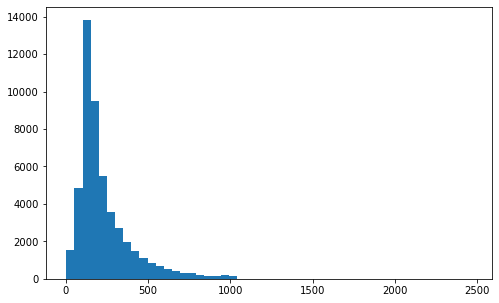

In [14]:
plt.figure(figsize = (8,5))
plt.hist(data.length, bins = 50)
plt.show()

<Figure size 576x1080 with 0 Axes>

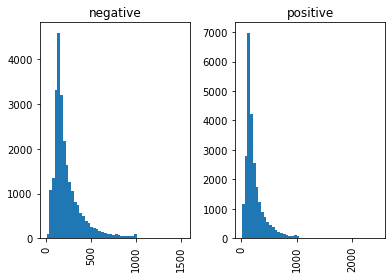

In [15]:
plt.figure(figsize = (8,15))
data.hist(column='length', by='sentiment', bins = 50)
plt.show()

# Data Engneering

In [16]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity']     = data.data_cleaned.apply(pol)
data['subjectivity'] = data.data_cleaned.apply(sub)

# Data transformation

In [17]:
encode = LabelEncoder()
data['sentiment'] = encode.fit_transform(data['sentiment'])

In [18]:
tokenizer = Tokenizer(5000)

tokenizer.fit_on_texts(data.data_cleaned)

data['data_inputs'] = tokenizer.texts_to_sequences(data.data_cleaned)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['data_inputs'], data.sentiment, test_size = 0.3)

In [20]:
from keras.preprocessing import sequence
import numpy as np
max_words = 500

x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_train = np.array(x_train)

x_test = sequence.pad_sequences(x_test, maxlen=max_words)
x_test = np.array(x_test)

In [21]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense

vocabulary_size = 5000
embedding_size=32

model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [23]:
batch_size = 200
num_epochs = 8
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs)

Epoch 1/8
175/175 [==============================] - 240s 1s/step - loss: 0.6068 - accuracy: 0.6634
Epoch 2/8
175/175 [==============================] - 268s 2s/step - loss: 0.2833 - accuracy: 0.8884
Epoch 3/8
175/175 [==============================] - 264s 2s/step - loss: 0.2294 - accuracy: 0.9140
Epoch 4/8
175/175 [==============================] - 265s 2s/step - loss: 0.2092 - accuracy: 0.9204
Epoch 5/8
175/175 [==============================] - 265s 2s/step - loss: 0.1952 - accuracy: 0.9279
Epoch 6/8
175/175 [==============================] - 276s 2s/step - loss: 0.1916 - accuracy: 0.9290
Epoch 7/8
175/175 [==============================] - 287s 2s/step - loss: 0.1666 - accuracy: 0.9382
Epoch 8/8
175/175 [==============================] - 278s 2s/step - loss: 0.1636 - accuracy: 0.9390


In [24]:
all_predictions = model.predict(x_test)

In [27]:
all_predictions = [1 if elm>0.5 else 0 for elm in all_predictions]

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, all_predictions))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      7535
           1       0.88      0.87      0.88      7465

    accuracy                           0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000



# Great job 

***bibliography***

* https://github.com/Kulbear/deep-learning-coursera/blob/master/Sequence%20Models/Operations%20on%20word%20vectors%20-%20v2.ipynb
* https://gist.github.com/aparrish/2f562e3737544cf29aaf1af30362f469
* https://github.com/Kulbear/deep-learning-coursera/blob/master/Sequence%20Models/Dinosaurus%20Island%20--%20Character%20level%20language%20model%20final%20-%20v3.ipynb
* https://github.com/adeshpande3/LSTM-Sentiment-Analysis/blob/master/Oriole%20LSTM.ipynb